# Import

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = 'dataset/penjualan_mobil_toyota.csv'
dataset = pd.read_csv(file_path)

In [36]:
# Explorasi Data
dataset['Bulan'] = pd.to_datetime(dataset['Bulan'])  # Ubah ke datetime
dataset.set_index('Bulan', inplace=True)  # Set Bulan sebagai indeks
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2011-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Penjualan  149 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB
None


In [37]:
dataset

,Penjualan
Bulan,
2011-01-01,27619
2011-02-01,25532
2011-03-01,32275
2011-04-01,21128
2011-05-01,19554
...,...
2023-01-01,28970
2023-02-01,27336
2023-03-01,29471


In [38]:
print(dataset.head())

            Penjualan
Bulan                
2011-01-01      27619
2011-02-01      25532
2011-03-01      32275
2011-04-01      21128
2011-05-01      19554


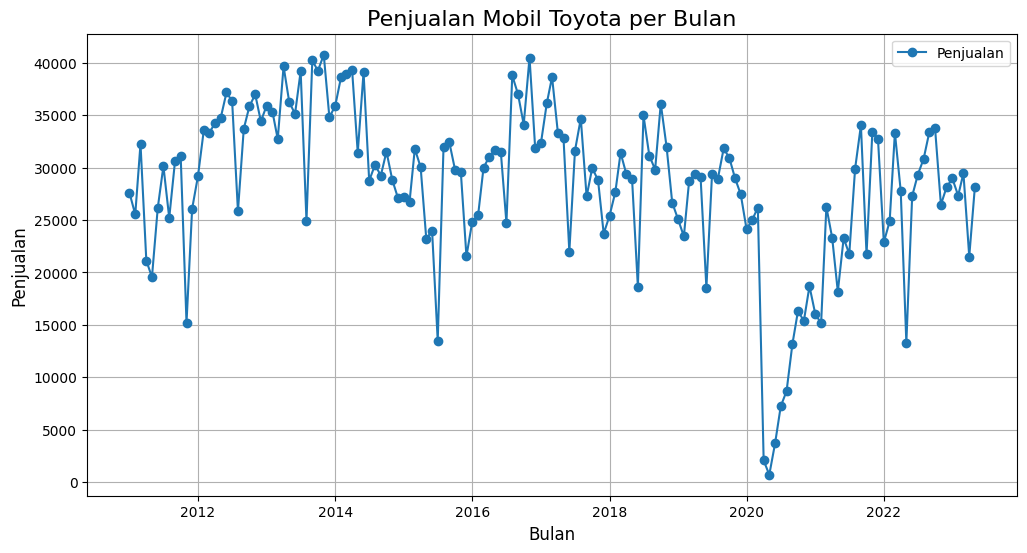

In [39]:
# Visualisasi Data
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Penjualan'], marker='o', linestyle='-', label='Penjualan')
plt.title('Penjualan Mobil Toyota per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Penjualan', fontsize=12)
plt.grid()
plt.legend()
plt.show()

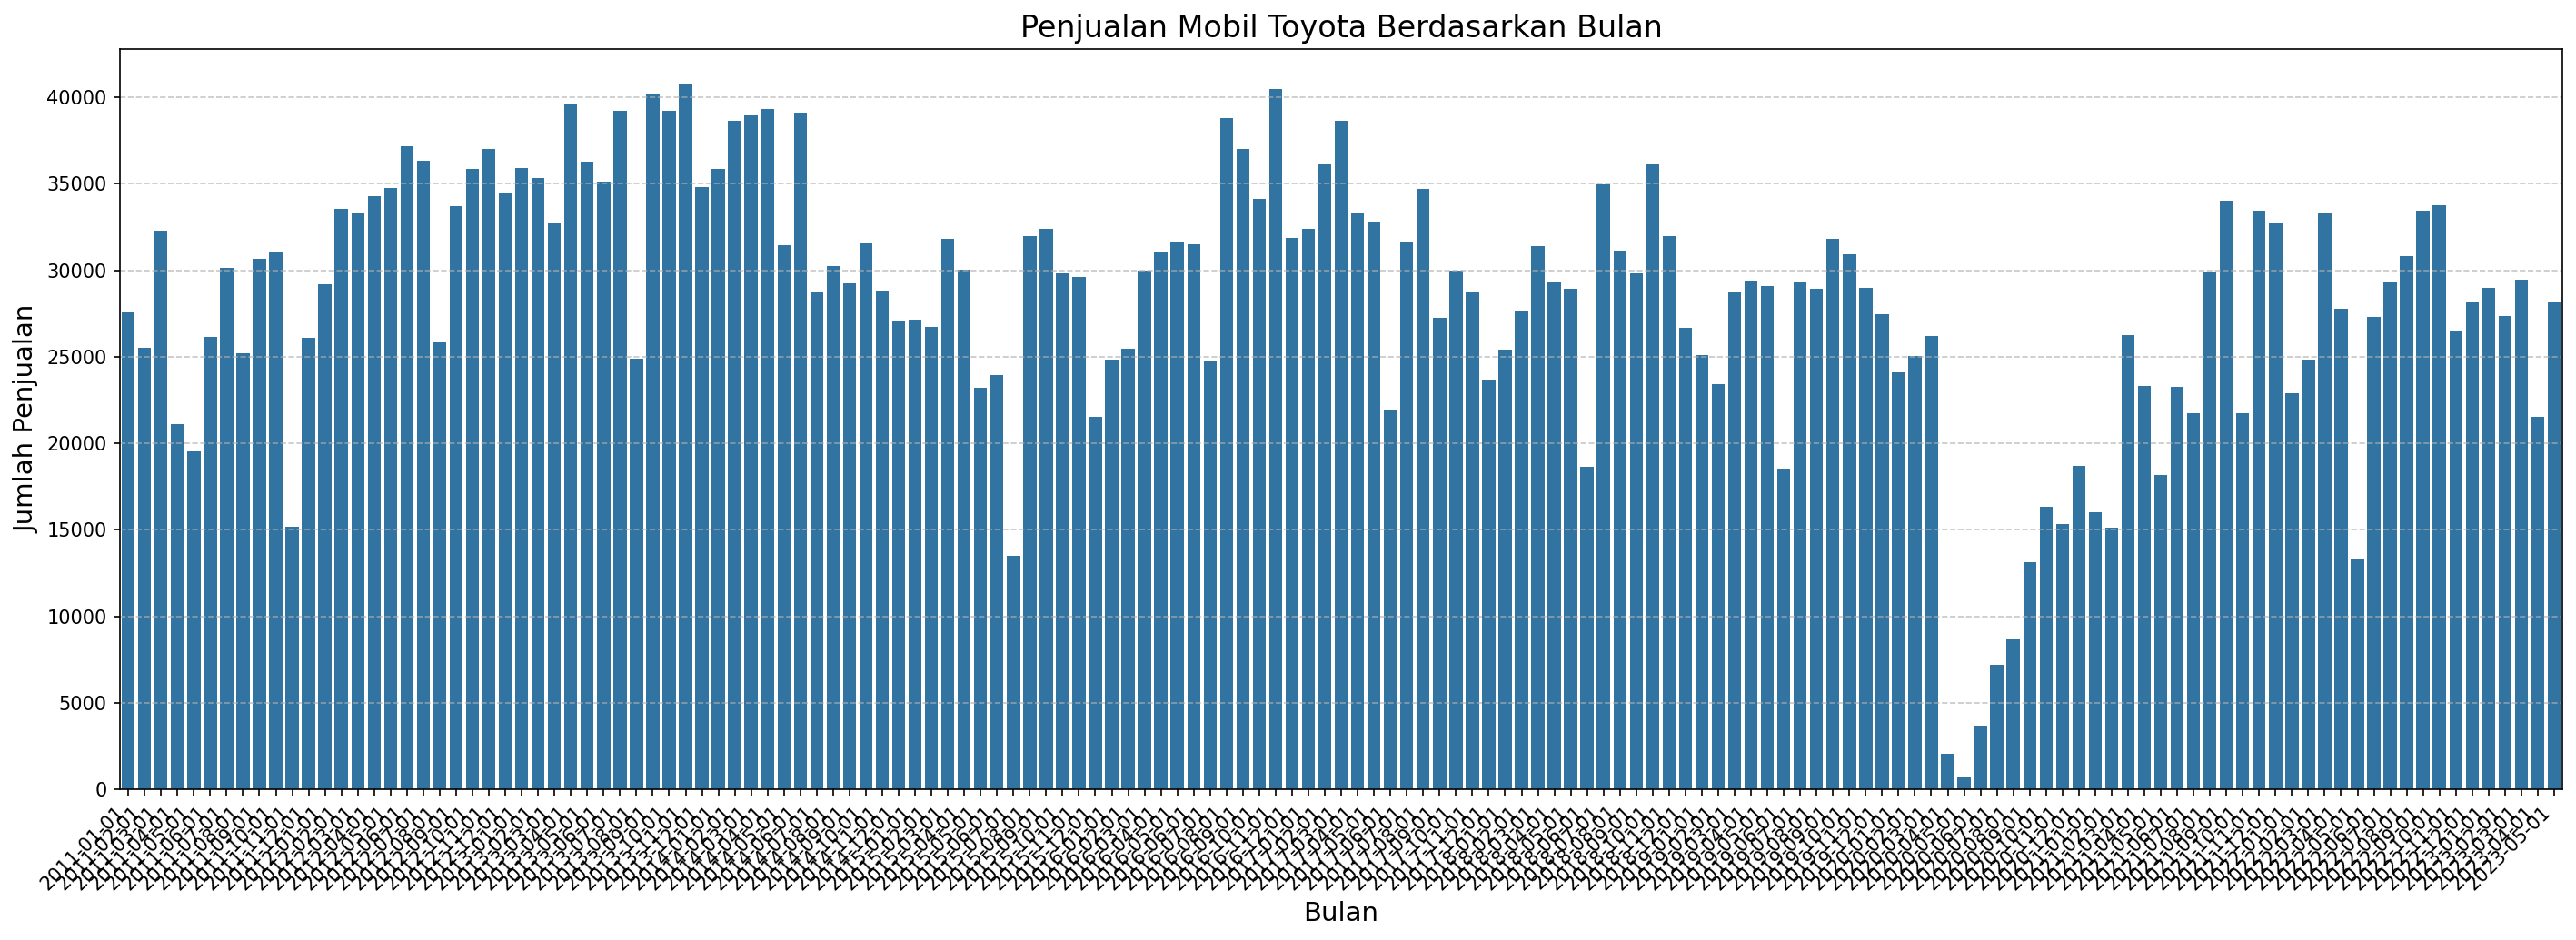

In [41]:
# Visualisasi Penjualan berdasarkan Bulan
plt.figure(figsize=(19,7), dpi=150)  # Meningkatkan resolusi gambar

# Membuat barplot dengan seaborn
sns.barplot(x='Bulan', y='Penjualan', data=dataset)

# Menambahkan rotasi label sumbu X untuk meningkatkan keterbacaan
plt.xticks(rotation=45, ha='right')

# Menambahkan grid untuk mempermudah pembacaan
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title("Penjualan Mobil Toyota Berdasarkan Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Penjualan", fontsize=14)

# Menyesuaikan jarak label agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [43]:
# Pemrosesan Data
dataset['Bulan'] = dataset.index.map(lambda x: x.toordinal())  # Ubah tanggal menjadi ordinal
X = dataset[['Bulan']].values  # Fitur
y = dataset['Penjualan'].values  # Target

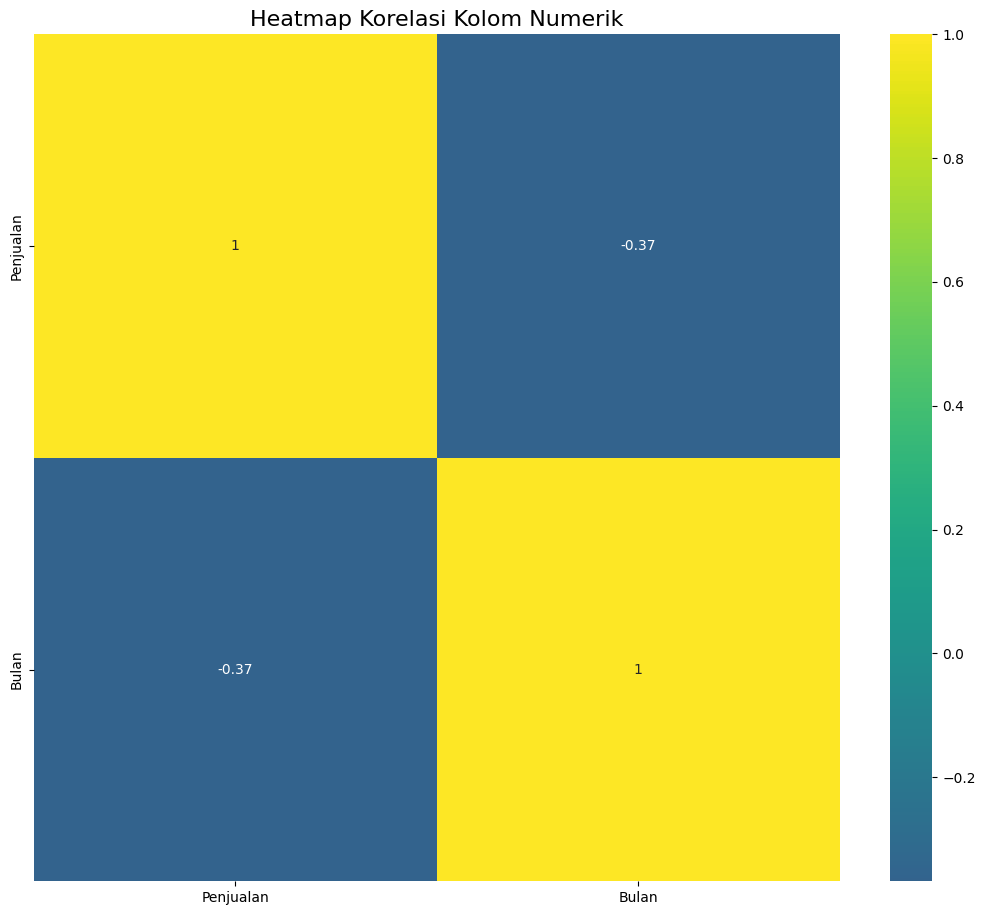

In [48]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(13, 11))
sns.heatmap(numerical_dataset.corr(), center=0, annot=True, cmap='viridis')
plt.title("Heatmap Korelasi Kolom Numerik", fontsize=16)
plt.show()

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 34549116.814867124
R-squared: 0.04597325473341629


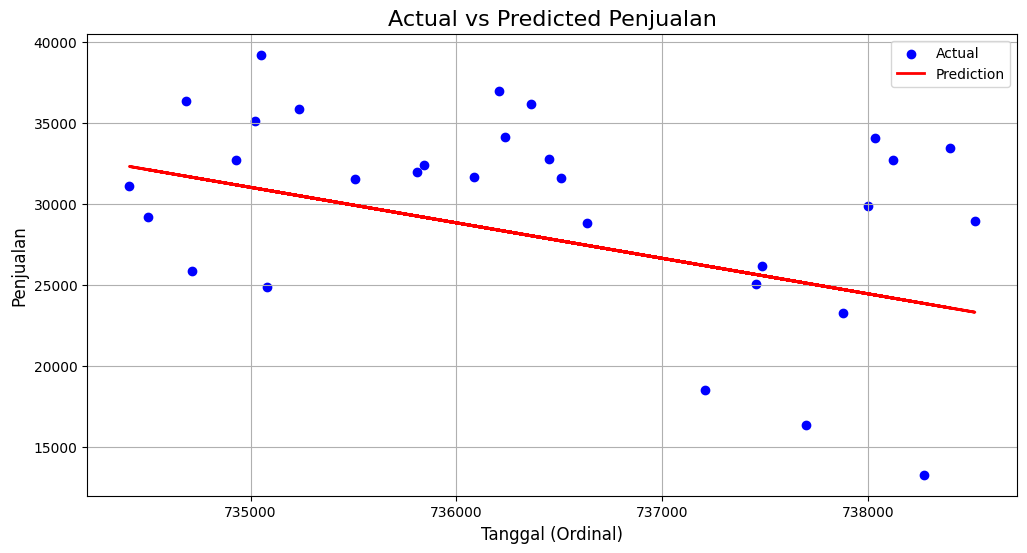

In [46]:
# Evaluasi Model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualisasi Hasil Prediksi
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Actual vs Predicted Penjualan', fontsize=16)
plt.xlabel('Tanggal (Ordinal)', fontsize=12)
plt.ylabel('Penjualan', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [47]:
def predict_sales(year, month):
    # Format input tanggal
    input_date = pd.Timestamp(f"{year}-{month}-01").toordinal()
    predicted_sales = model.predict(np.array([[input_date]]))
    return round(predicted_sales[0])

# Contoh prediksi
print("Prediksi penjualan untuk Januari 2025:", predict_sales(2025, 1))

Prediksi penjualan untuk Januari 2025: 21724
